In [3]:
# importing the libraries
import pandas as pd
import numpy as np

# for reading and displaying images
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline

# for creating validation set
from sklearn.model_selection import train_test_split

# for evaluating the model
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# PyTorch libraries and modules
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD

In [2]:
import torch
a=torch.tensor([0,1,2.1],dtype=torch.int32)
b=a.view(3,1)
print(a)
c=torch.tensor([[1,2],[2,3],[3,4]])
print(c.type)
#new_float_tensor = old_int_tensor.type(torch.FloatTensor)

tensor([0, 1, 2], dtype=torch.int32)
<built-in method type of Tensor object at 0x0000018CA5043740>


In [3]:
a=torch.tensor(2.0,requires_grad=True)
b=a**3
b.backward()
print(a.grad)

tensor(12.)


In [4]:
a=np.array([1,2,3])
b=torch.from_numpy(a)
c=b.numpy()
print(b)

tensor([1, 2, 3], dtype=torch.int32)


In [5]:
# Basic Linear Output
import torch

b=torch.tensor(-1.0,requires_grad=True)
w=torch.tensor(2.0,requires_grad=True)
x=torch.tensor([1.0])
def forward(x):
  y=w*x+b
  return y
y_hat=forward(x)
print(y_hat)


tensor([1.], grad_fn=<AddBackward0>)


In [ ]:
#Basic Linear output using Linear - Pytorch Tensor

from torch.nn import Linear
torch.manual_seed(1)
lr = Linear(in_features=1, out_features=1, bias=True)
print("Parameters w and b: ", list(lr.parameters()))
print("Python dictionary: ",lr.state_dict())
print("keys: ",lr.state_dict().keys())
print("values: ",lr.state_dict().values())
x = torch.tensor([[1.0], [2.0]])
yhat = lr(x)
print("The prediction: ", yhat)

Parameters w and b:  [Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]
Python dictionary:  OrderedDict([('weight', tensor([[0.5153]])), ('bias', tensor([-0.4414]))])
keys:  odict_keys(['weight', 'bias'])
values:  odict_values([tensor([[0.5153]]), tensor([-0.4414])])
The prediction:  tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)


In [6]:

m = torch.nn.Linear(20, 30)
input = torch.randn(128, 20)
output = m(input)
print(output.size())

torch.Size([128, 30])


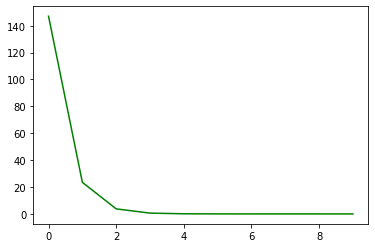

In [31]:
#gradient descent
import torch
w=torch.tensor(-10.0,requires_grad=True)
x=torch.arange(-3,3,0.1).view(-1,1)
f=-3*x
#plt.plot(x.numpy(),f.numpy())
#plt.show()
y=f+0.1*torch.randn(x.size())
#plt.plot(x.numpy(),y.numpy(),'r')
#plt.show()
cost=[]
def forward(x):
    return w*x
def criteron(yhat,y):
    return torch.mean((yhat-y)**2)

lr=0.1
for epoch in range(10):
    yhat=forward(x)
    loss=criteron(yhat,y)
    loss.backward()
    w.data=w.data-lr*w.grad.data
    w.grad.data.zero_()
    cost.append(loss.item())
    #print(w)
    #print(yhat)
plt.plot(cost,'g')
plt.show()
    

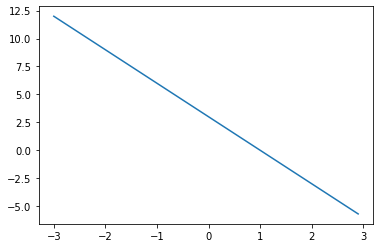

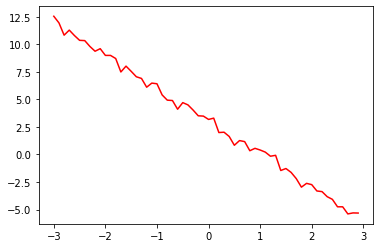

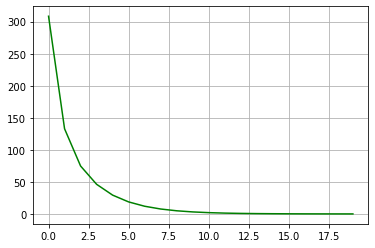

In [1]:
#batch gradient descent
import torch
import matplotlib.pyplot as plt
%matplotlib inline
w=torch.tensor(-10.0,requires_grad=True)
b=torch.tensor(-10.0,requires_grad=True)
x=torch.arange(-3,3,0.1).view(-1,1)
f=-3*x+3
plt.plot(x.numpy(),f.numpy())
plt.show()
y=f+0.3*torch.randn(x.size())
plt.plot(x.numpy(),y.numpy(),'r')
plt.show()
cost=[]
def forward(x,b):
    return w*x+b
def criteron(yhat,y):
    return torch.mean((yhat-y)**2)

lr=0.1
for epoch in range(20):
    yhat=forward(x,b)
    loss=criteron(yhat,y)
    loss.backward()
    w.data=w.data-lr*w.grad.data
    w.grad.data.zero_()
    b.data=b.data-lr*b.grad.data
    b.grad.data.zero_()
    cost.append(loss.item())
    #print(w)
    #print(yhat)
plt.plot(cost,'g')
plt.grid()
plt.show()
    

In [11]:
print(b)
print(w)

tensor(2.8485, requires_grad=True)
tensor(-2.9731, requires_grad=True)


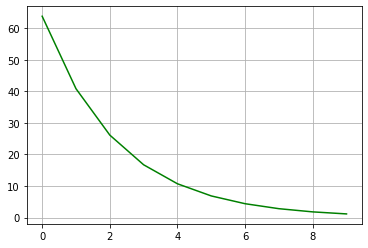

In [20]:
# stochastic gradient descent basic implementation
#check out implementation of dataloader set
import torch
import matplotlib.pyplot as plt
%matplotlib inline
w=torch.tensor(-10.0,requires_grad=True)
b=torch.tensor(-10.0,requires_grad=True)
#view is used to reshape the data. Here row vector is converted to column vector.
X=torch.arange(-3,3,0.1).view(-1,1)
Y=-3*x+3+0.2*torch.randn(x.size())
#print(y)
cost=[]
def forward(x,b):
    return w*x+b
def criteron(yhat,y):
    return torch.mean((yhat-y)**2)

lr=0.01
for epoch in range(10):
    total=0
    for x,y in zip(X,Y):
        yhat=forward(x,b)
        loss=criteron(yhat,y)
        loss.backward()
        w.data=w.data-lr*w.grad.data
        b.data=b.data-lr*b.grad.data
        w.grad.data.zero_()
        b.grad.data.zero_()
        total+=loss.item()
    cost.append(total)
plt.plot(cost,'g')
plt.grid()
plt.show()


In [18]:
print(cost)

[69.75442504882812, 69.75444030761719, 69.75442504882812, 69.75444030761719, 69.75442504882812, 69.75444030761719, 69.75442504882812, 69.75444030761719, 69.75442504882812, 69.75444030761719]


In [15]:

embedding = torch.nn.Embedding(10, 3)
#print(embedding)
#embedding(torch.tensor([1,2,3]))
a=torch.tensor([[1,2,3],[4,5,6]])
b=a.reshape(-1,2)
print(b)

tensor([[1, 2],
        [3, 4],
        [5, 6]])


In [26]:
torch.nn.functional.one_hot(torch.arange(0,5),num_classes=5)

tensor([[1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1]])

In [39]:
target = torch.randint(0, 10, (3,))
torch.nn.functional.one_hot(target,num_classes=11)


tensor([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])

In [43]:
x = torch.tensor([0.25,0.5,0.25])
c = torch.distributions.categorical.Categorical(x)
c.sample() # error

tensor(0)

In [56]:
import  numpy as np
#clamps all element in the range of .clamp(min,max)
a=torch.tensor([[1,2,3,4],[5,6,7,8]])
print(a)
a.clamp(0,-1)

tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])


tensor([[-1, -1, -1, -1],
        [-1, -1, -1, -1]])

In [22]:
a = torch.randn(4, 1)
print(torch.argmin(a,dim=-1))
print(a)

tensor([0, 0, 0, 0])
tensor([[0.9534],
        [0.3180],
        [1.0476],
        [0.7668]])


In [4]:
import torch
a = torch.randn(2,3)
print(torch.transpose(a,0,1))

tensor([[-0.2503, -1.0120],
        [ 0.5515, -1.7247],
        [-0.2516,  0.9143]])
